# Tennis ACE

Project goal is to create a linear regression model that predicts the outcome for a tennis player based on their playing habits.


Dataset for this project is given from the Association of Tennis Professionals (ATP).

By analyzing and modeling the data, it would help to determine what it takes to be one of the best tennis players in the world.

## The DATA

The data consist of 1721 rows and 24 features(columns). 
It has 438 unique players data from year 2009 to 2017. All features are in correct data types and there are none missing values. The dataset is **tidy** and **clean** - fit for the **exploratory analysis**.


The features could be split into 4 categories:
* **IDENTIFYING DATA**
* **OFFENSIVE STATS**
* **DEFENSIVE STATS**
* **OUTCOMES**

#### IDENTIFYING DATA

**Player**: name of the tennis player

**Year**: year data was recorded

#### OFFENSIVE STATS

**Aces**: number of serves by the player where he scores without the receiver touching the ball

**DoubleFaults**: number of times player failed both first and second serve attempts

**FirstServe**: % of first-serve attempts made

**FirstServePointsWon**: % of points won by the player after successful first serve attempt

**SecondServePointsWon**: % of points won by the player after successful second serve attempt
 
**BreakPointsFaced**: number of times where the receiver could have won service game of the player

**BreakPointsSaved**: % of the time the player was able to stop the receiver from winning service 
game when they had the chance

**ServiceGamesPlayed**: total number of games where the player served

**ServiceGamesWon**: total number of games where the player served and won

**TotalServicePointsWon**: % of points in games where the player served that they won

#### DEFENSIVE STATS

**FirstServeReturnPointsWon**: % of points won on the opponents first-serve attempts

**SecondServeReturnPointsWon**: % of points won on the opponents secend-serve attempts

**BreakPointsOpportunities**: number of times where the player could have won the service game of the opponent

**BreakPointsConverted**: % of points the player was able to win their opponents serve-game

**ReturnGamesPlayed**: total number of games where the player’s opponent served

**ReturnGamesWon**: total number of games where the player’s opponent served and the player won

**ReturnPointsWon**: total number of points where the player’s opponent served and the player won

#### OUTCOMES
**TotalPointsWon**: % of points won by the player

**Wins**: number of matches won during a year

**Losses**: number of matches lost during a year

**Winnings**: total winnings in USD($) during a year

**Ranking**: ranking at the end of year

In [4]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [3]:
# loading the dataset
data = pd.read_csv('tennis_stats.csv')
#print(data.head(10))

# features data types
print(data.dtypes)

description = data.describe()
print(description)

# checking if dataframe has any nan values
nan_values = data.isnull().values.any()
print(nan_values)
# shape of dataframe
shape = data.shape
print(shape)
#unique players
unique_players = data.Player.nunique()
print(unique_players)


Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object
              Year   FirstServe  FirstServePointsWon  \
count  1721.000000

## Exploratory analysis

As the main task is to determine _what it takes_  to be one of the best tennis players in the world,
offensive and defensive features would be consider as a key factors to be one of the best - in this case - player with highest **WIN percentage** or **WINS** count.


To find feature with biggest linear impact on determined **OUTCOMES** - **WINS** and **WIN %**, scatter plot graphs (offensive/defensive feature against OUTCOMES) are used. 

Also, each feature vs outcomes are calculated to validate linear correlations.


Unfortunately, no strong linear correlation pairs were found against **WIN %** outcome. 
Features for the best player would be considered from offensive/defensive features against WINS count outcome.


From scatter plots, strong linear correlation pairs are:

**OFENSIVE**
* ACES
* DoubleFaults
* BreakPointsFaced
* ServiceGamesPlayed


**DEFENSIVE**
* BreakPointsOppurtunities
* ReturnGamesPlayed


These pairs would be used for single and multiple linear regression modelling.

In [42]:
#all feature vs feature correlation table
#print(data.corr())
# creating extra OUTCOME features - TotalMatches, WinPercentage 

data['TotalMatches'] = data.Wins + data.Losses
data['WinPercentage'] = round((data.Wins / data.TotalMatches) * 100, 2)

# features 
offensive = ['Aces',
             'DoubleFaults',
             'FirstServe',
             'FirstServePointsWon',
             'SecondServePointsWon',
             'BreakPointsFaced',
             'BreakPointsSaved',
             'ServiceGamesPlayed',
             'ServiceGamesWon',
             'TotalServicePointsWon']
defensive = ['FirstServeReturnPointsWon',
             'SecondServeReturnPointsWon',
             'BreakPointsOpportunities',
             'BreakPointsConverted',
             'ReturnGamesPlayed',
             'ReturnGamesWon',
             'ReturnPointsWon']
features = offensive + defensive

#outcomes for best players
outcomes = ['Wins','WinPercentage']




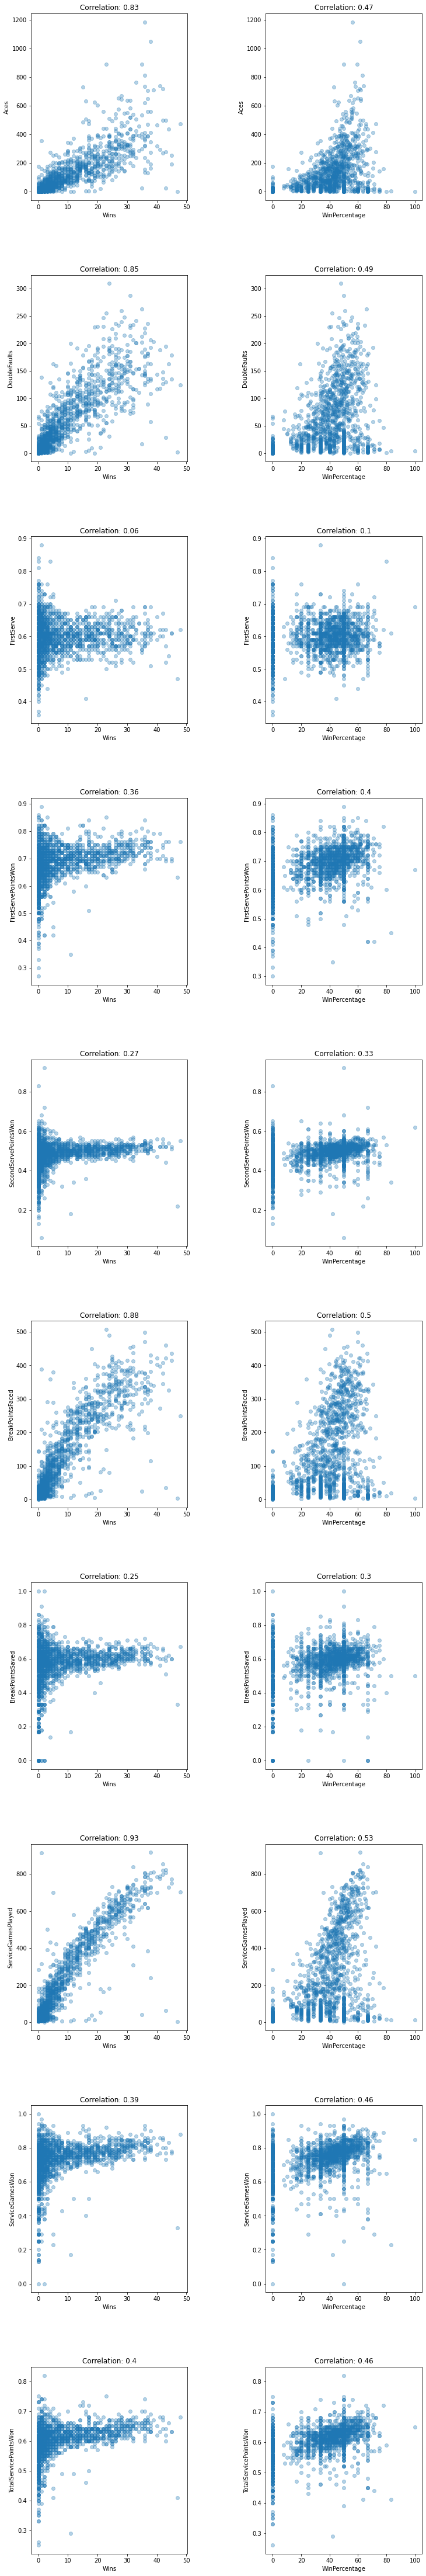

In [43]:
# offensive features against Wins and WinPercentage
plt.figure(figsize=(12, 80))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(offensive)):
    for j in range(len(outcomes)):
        plt.subplot(len(offensive), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(data[outcomes[j]], data[offensive[i]], alpha=0.33)
        plt.xlabel(outcomes[j])
        plt.ylabel(offensive[i])
        plt.title(f'Correlation: {round(data[offensive[i]].corr(data[outcomes[j]]), 2)}')
plt.show()

In [44]:
# defensive features against Wins

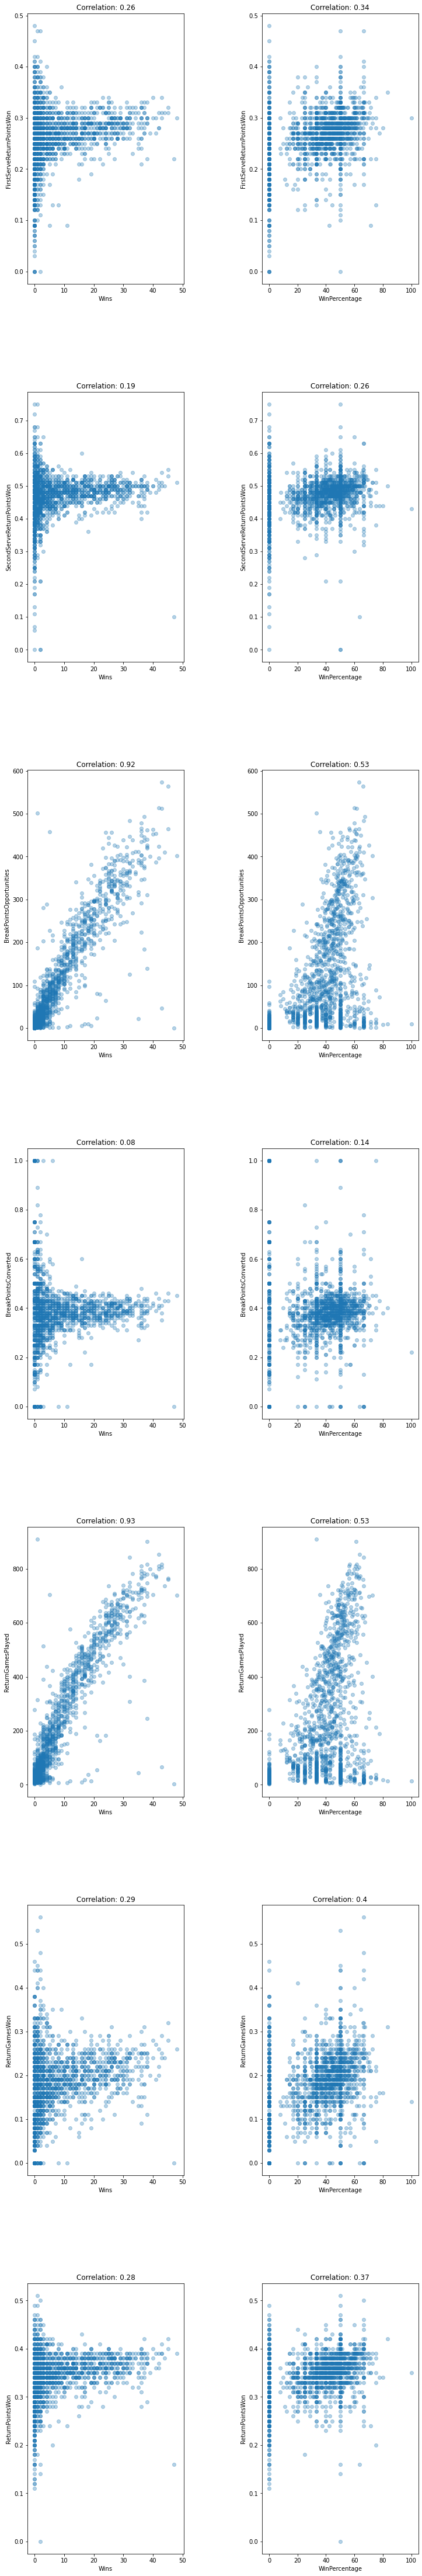

In [56]:
plt.figure(figsize=(12, 80))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(defensive)):
    for j in range(len(outcomes)):
        plt.subplot(len(defensive), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(data[outcomes[j]], data[defensive[i]], alpha=0.33)
        plt.xlabel(outcomes[j])
        plt.ylabel(defensive[i])
        plt.title(f'Correlation: {round(data[defensive[i]].corr(data[outcomes[j]]), 2)}')
plt.show()

## Single feature linear regression

Single feature linear regression results showed that, the best model for predicting WIN outcome from offensive features - ServiceGamesPlayed.

From defensive features - ReturnGamesPlayed.

Single linear regression results show that player who plays more - wins more. Funny huh...

In [57]:
# function to perform single linear regression
def linear_regression(x, y, col_name_x):
    # split data into training and test datasets
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

    # initialize and train model
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    # predict winnings
    y_predict = model.predict(x_test)

    # plot actual winnings vs predicted winnings
    plt.scatter(y_test, y_predict, alpha=0.4)
    plt.xlabel('Actual Wins')
    plt.ylabel('Predicted Wins')
    plt.title(f'Actual vs predicted wins - {col_name_x}')
    plt.show()

    # evaluate model's accuracy on the test set
    print('Model\'s Test Accuracy:')
    return model.score(x_test, y_test)

Aces vs Wins



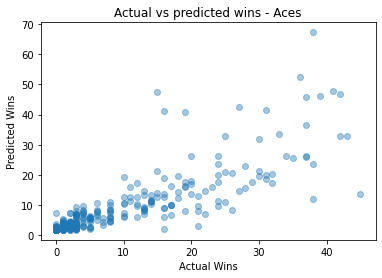

Model's Test Accuracy:
0.6895728460055879
------------------------------
DoubleFaults vs Wins



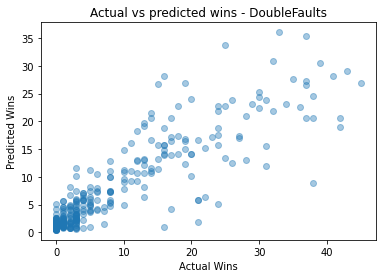

Model's Test Accuracy:
0.7506142680594722
------------------------------
BreakPointsFaced vs Wins



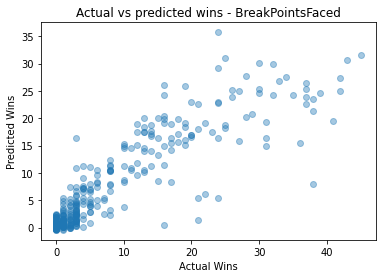

Model's Test Accuracy:
0.7722783859417024
------------------------------
ServiceGamesPlayed vs Wins



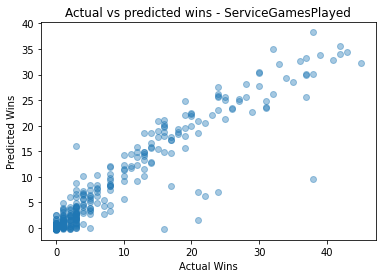

Model's Test Accuracy:
0.8844957827185598
------------------------------


In [58]:
# offensive single linear regression

# list with features
offensive_features = ['Aces','DoubleFaults','BreakPointsFaced','ServiceGamesPlayed']
defensive_features = ['BreakPointsOpportunities','ReturnGamesPlayed']

# single linear regressions with offensive features
for i in range(len(offensive_features)):
    print(f'{offensive_features[i]} vs Wins\n')
    # create a figure at each iteration
    plt.figure()
    print(linear_regression(data[[offensive_features[i]]], data[['Wins']], offensive_features[i]))
    print('-' * 30)


BreakPointsOpportunities vs Wins



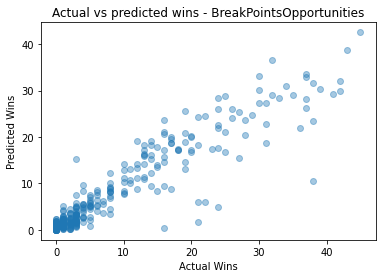

Model's Test Accuracy:
0.8610671375741137
------------------------------
ReturnGamesPlayed vs Wins



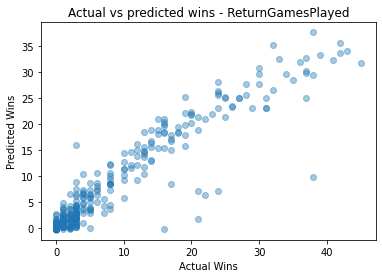

Model's Test Accuracy:
0.8821823224722215
------------------------------


In [59]:
# offensive single linear regression

# list with features
defensive_features = ['BreakPointsOpportunities','ReturnGamesPlayed']

# single linear regressions with offensive features
for i in range(len(defensive_features)):
    print(f'{defensive_features[i]} vs Wins\n')
    # create a figure at each iteration
    plt.figure()
    print(linear_regression(data[[defensive_features[i]]], data[['Wins']], defensive_features[i]))
    print('-' * 30)

## Multiple feature linear regression

Best model to predict Wins with multiple feature linear regression consists of:

Aces and BreakPointsOpportunities features. This model performs with 0.90 of test accuracy.


Aces, DoubleFaults vs Wins



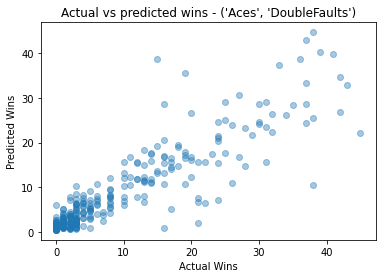

Model's Test Accuracy:
0.8050122216500659
------------------------------
Aces, BreakPointsFaced vs Wins



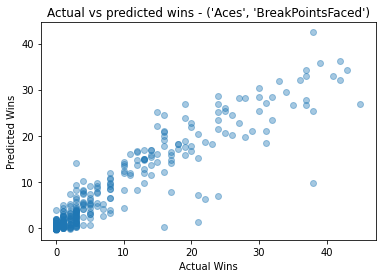

Model's Test Accuracy:
0.8579159434863611
------------------------------
Aces, ServiceGamesPlayed vs Wins



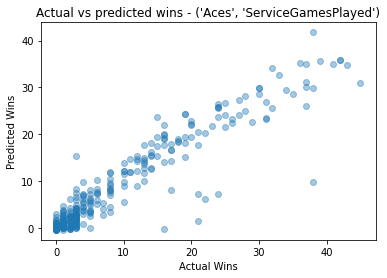

Model's Test Accuracy:
0.8867403339395739
------------------------------
Aces, BreakPointsOpportunities vs Wins



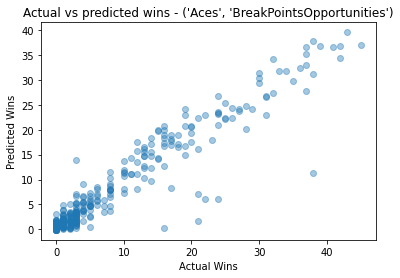

Model's Test Accuracy:
0.9022743555039557
------------------------------
Aces, ReturnGamesPlayed vs Wins



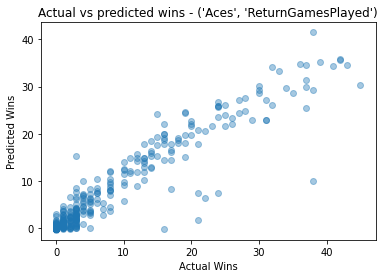

Model's Test Accuracy:
0.8852573976342635
------------------------------
DoubleFaults, BreakPointsFaced vs Wins



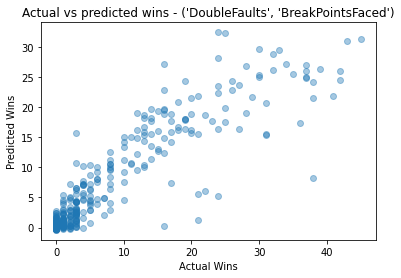

Model's Test Accuracy:
0.7886290075853526
------------------------------
DoubleFaults, ServiceGamesPlayed vs Wins



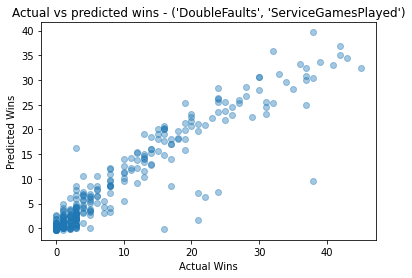

Model's Test Accuracy:
0.8854963909365559
------------------------------
DoubleFaults, BreakPointsOpportunities vs Wins



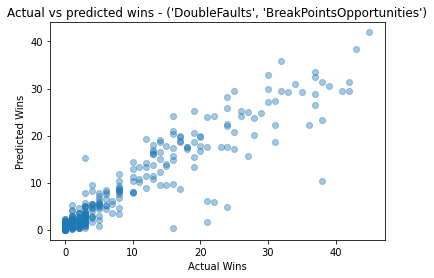

Model's Test Accuracy:
0.8618442596938329
------------------------------
DoubleFaults, ReturnGamesPlayed vs Wins



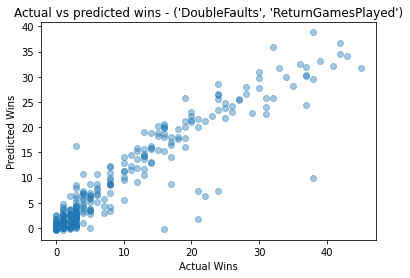

Model's Test Accuracy:
0.8830470653968869
------------------------------
BreakPointsFaced, ServiceGamesPlayed vs Wins



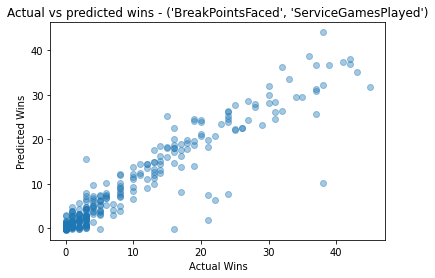

Model's Test Accuracy:
0.8926919695536097
------------------------------
BreakPointsFaced, BreakPointsOpportunities vs Wins



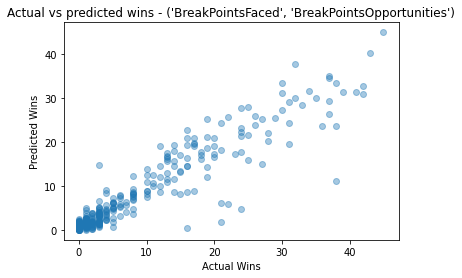

Model's Test Accuracy:
0.8699164238014214
------------------------------
BreakPointsFaced, ReturnGamesPlayed vs Wins



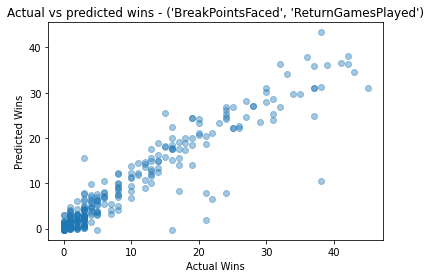

Model's Test Accuracy:
0.8914080246908188
------------------------------
ServiceGamesPlayed, BreakPointsOpportunities vs Wins



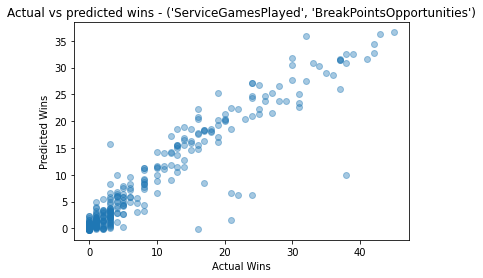

Model's Test Accuracy:
0.886834202884075
------------------------------
ServiceGamesPlayed, ReturnGamesPlayed vs Wins



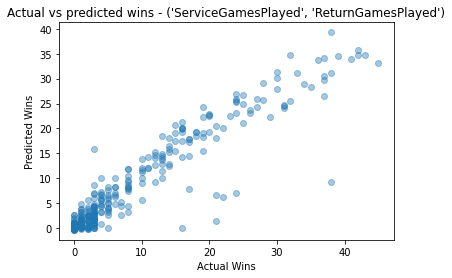

Model's Test Accuracy:
0.8870057787792881
------------------------------
BreakPointsOpportunities, ReturnGamesPlayed vs Wins



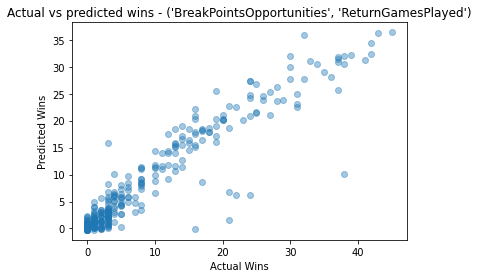

Model's Test Accuracy:
0.8848615506854945
------------------------------


In [61]:
#creating list of offensive and defensive features
lst = offensive_features + defensive_features

#using function combinations() to make all possible combinations from features list(lst)
pairs = list(combinations(lst, 2))

# multiple feature linear regression with 2 features
for i in range(len(pairs)):
    print(f'{pairs[i][0]}, {pairs[i][1]} vs Wins\n')
    # create a figure at each iteration
    plt.figure()
    print(linear_regression(data[[pairs[i][0], pairs[i][1]]], data[['Wins']], pairs[i]))
    print('-' * 30)

## Summary

Based on ATP dataset, linear and multiple linear regression models were created to predict tennis match win based on offensive and defensive features.

From single linear regression modelling, models with highest test accuracy:
* offensive feature - ServiceGamesPlayed, 0.88 test accuracy;
* defensive feature - ReturnGamesPlayed, 0.88 test accuracy;

From multiple linear regression modelling, offensive and defensive feature combination with highest test accuracy - Aces and BreakPointsOpportunities. This model performs with 0.90 of test accuracy.


Project helped to practice single/multiple linear regression modelling workflow.

It could be improved by involving feature engineering.